In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('train.csv')

In [3]:
df.shape

(42000, 785)

In [4]:
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
df['label'].value_counts()

1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64

In [6]:
import matplotlib.pyplot as plt

In [7]:
df.sample()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
24876,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
df.iloc[274,1:].values.reshape(28,28)

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

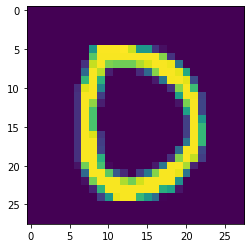

In [9]:
plt.imshow(df.iloc[260,1:].values.reshape(28,28))

In [10]:
X = df.iloc[:,1:]
y = df.iloc[:,0]

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state = 42)

In [13]:
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()

In [14]:
scalar.fit(X_train)
X_train = scalar.transform(X_train)
X_test = scalar.transform(X_test)

In [15]:
from sklearn.neighbors import KNeighborsClassifier

In [16]:
knn = KNeighborsClassifier()

In [17]:
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [18]:
y_pred = knn.predict(X_test)

In [19]:
y_pred

array([8, 1, 9, ..., 3, 0, 9], dtype=int64)

In [20]:
y_test

5457     8
38509    1
25536    9
31803    9
39863    8
        ..
8388     4
29359    9
40276    3
18421    0
4335     9
Name: label, Length: 8400, dtype: int64

In [21]:
from sklearn.metrics import accuracy_score

In [22]:
accuracy_score(y_test, y_pred)

0.9391666666666667

In [23]:
# Apply PCA

In [24]:
from sklearn.decomposition import PCA

In [25]:
pca = PCA(n_components=200)

In [26]:
X_train_trf = pca.fit_transform(X_train)
X_test_trf = pca.transform(X_test)

In [27]:
X_train_trf.shape

(33600, 200)

In [28]:
X_test.shape

(8400, 784)

In [29]:
knn = KNeighborsClassifier()

In [30]:
knn.fit(X_train_trf,y_train)

KNeighborsClassifier()

In [31]:
y_pred = knn.predict(X_test_trf)

In [32]:
accuracy_score(y_test, y_pred)

0.950595238095238

In [33]:
from sklearn.decomposition import PCA

pca = PCA(n_components=None)

X_train_trf = pca.fit_transform(X_train)
X_test_trf = pca.transform(X_test)

In [34]:
list(enumerate(np.cumsum(pca.explained_variance_ratio_)))

[(0, 0.05785192251268528),
 (1, 0.09934461931315985),
 (2, 0.13738700940872636),
 (3, 0.16704963711434292),
 (4, 0.19286525395423754),
 (5, 0.2154150557880905),
 (6, 0.2351457359940298),
 (7, 0.25289853574585147),
 (8, 0.2685850423529699),
 (9, 0.2829456751561511),
 (10, 0.2966482235340854),
 (11, 0.3089207735648945),
 (12, 0.32038989353321384),
 (13, 0.3316201673892553),
 (14, 0.34220545588258994),
 (15, 0.35240476644348345),
 (16, 0.3619815279645415),
 (17, 0.37140861613150905),
 (18, 0.3805335104177518),
 (19, 0.38943521231827266),
 (20, 0.3978346172707056),
 (21, 0.4060352492311736),
 (22, 0.41388828152286244),
 (23, 0.4214556785914155),
 (24, 0.4288282888158251),
 (25, 0.4358471353490012),
 (26, 0.4428263326260868),
 (27, 0.4495373774556871),
 (28, 0.45593582775728864),
 (29, 0.46223920067155644),
 (30, 0.46839270915303394),
 (31, 0.47441659573961725),
 (32, 0.48025333545747134),
 (33, 0.4860388130491794),
 (34, 0.49176214453222433),
 (35, 0.49722614226872996),
 (36, 0.50265821595

In [35]:
pca = PCA(n_components=222)
X_train_trf = pca.fit_transform(X_train)
X_test_trf = pca.transform(X_test)
X_train_trf.shape
X_test.shape
knn = KNeighborsClassifier()
knn.fit(X_train_trf,y_train)
y_pred = knn.predict(X_test_trf)
print(accuracy_score(y_test, y_pred))

0.9492857142857143
